In [149]:
from few.trajectory.ode import SchwarzEccFlux

rhs = KerrEccEqFlux()
rhs_2 = SchwarzEccFlux()


In [153]:
m1 = 1e6  # Solar masses
m2 = 1e1  # Solar masses
a = 0.0  # For a Schwarzschild inspiral, the spin parameter is zero

rhs.add_fixed_parameters(m1, m2, 0.5)
rhs_2.add_fixed_parameters(m1, m2, 0.5)


In [154]:
p = 10.0
e = 0.3
x = 1.0  # Schwarzschild inspiral is equatorial by definition

pdot, edot, xIdot, Omega_phi, Omega_theta, Omega_r = rhs([p, e, x])
print(pdot, edot, xIdot, Omega_phi, Omega_theta, Omega_r)

pdot_2, edot_2, xIdot_2, Omega_phi_2, Omega_theta_2, Omega_r_2 = rhs_2([p, e, x])
print(pdot_2, edot_2, xIdot_2, Omega_phi_2, Omega_theta_2, Omega_r_2)

-0.012756664640680858 -0.0005901367374446975 0.0 0.027881254842866014 0.027079643208244682 0.0200482707680641
-0.013710408332658849 -0.000633754663534788 0.0 0.027881254842866014 0.027079643208244682 0.0200482707680641


In [152]:
from few.trajectory.ode.base import get_ode_properties

print(get_ode_properties(rhs))

print(get_ode_properties(rhs_2))

{'convert_Y': False, 'equatorial': True, 'circular': False, 'supports_ELQ': True, 'background': 'Kerr', 'separatrix_buffer_dist': 0.002, 'nparams': 6, 'flux_output_convention': 'pex', 'separatrix_buffer_dist_grid': 0.001}
{'convert_Y': False, 'equatorial': True, 'circular': False, 'supports_ELQ': True, 'background': 'Schwarzschild', 'separatrix_buffer_dist': 0.1, 'nparams': 6, 'flux_output_convention': 'pex'}


In [156]:
print(rhs.max_e(10.))
print(rhs_2.max_e(10.))


0.8491305415768282
0.755


In [164]:
from few.trajectory.ode import KerrEccEqFlux
import matplotlib.pyplot as plt
import numpy as np

rhs_kerr = KerrEccEqFlux()

spin = 0.0

p_lim_check = np.linspace(2, 200, 101)
e_max = np.asarray([rhs_kerr.max_e(p_here, a=spin) for p_here in p_lim_check])
plt.plot(p_lim_check, e_max)
plt.xlabel("Semi-latus rectum")
plt.ylabel("Maximum eccentricity")

ValueError: Interpolation: p out of bounds. Must be greater than innermost stable circular orbit + buffer = 6.002.

In [7]:
from few.trajectory.inspiral import EMRIInspiral

In [8]:
# You can also instantiate this as EMRIInspiral(func="KerrEccEqFlux") to save an import.
traj_model = EMRIInspiral(func=KerrEccEqFlux)


In [11]:
c = 299792458                           # Speed of light: m/s
G = 6.6743e-11                          # Gravitational Constant: m^3 / (kg s^2)
M_sun = 2e30                            # Solar Masses: kg
parsec_to_m = 3e16                      # meters per parsec
D = 1e3*parsec_to_m*8                   # Distance to galactic center: meters
yr = 3600.0*24.0*365.0                  # One year in seconds
default_integration_time = (10**9 * yr) # Default integration time: seconds
D_seconds = D/c                         # Distance to galactic center: seconds

In [68]:
m1 = 4e6
m2 = 0.05
a = 0.0  # This model supports a spinning primary compact object
e0 = 0.9
#p0 = 2*10**(-1)*(1-e0)
p0 = 17
print(p0/(1-e0))
xI0 = 1.0  # +1 for prograde, -1 for retrograde inspirals

T = 1000000  # duration of trajectory in years (as defined by few.utils.constants.YRSID_SI)


traj_pars = [m1, m2, a, p0, e0, xI0]

170.00000000000003


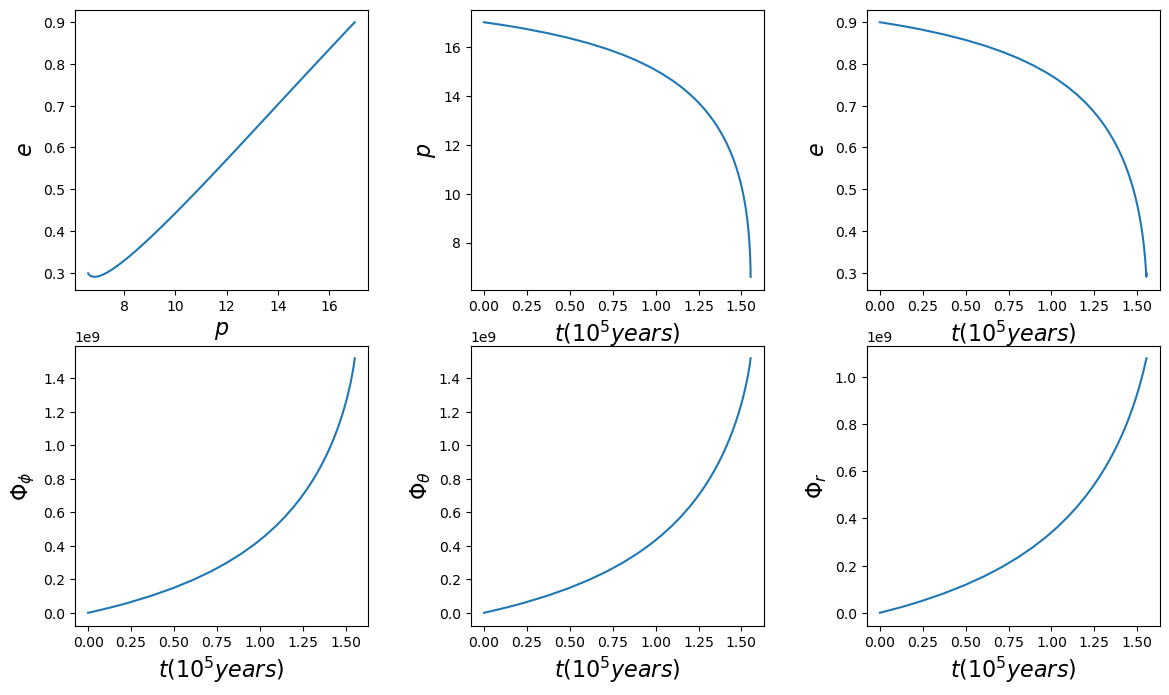

In [166]:
import matplotlib.pyplot as plt
import numpy as np

t, p, e, xI, Phi_phi, Phi_theta, Phi_r = traj_model(*traj_pars, T=T)
t = t/yr/(10**5)
fig, axes = plt.subplots(2, 3)
plt.subplots_adjust(wspace=0.35)
fig.set_size_inches(14, 8)
axes = axes.ravel()

ylabels = [r"$e$", r"$p$", r"$e$", r"$\Phi_\phi$", r"$\Phi_\theta$", r"$\Phi_r$"]
xlabels = [r"$p$", r"$t (10^5 years)$", r"$t (10^5 years)$", r"$t (10^5 years)$", r"$t (10^5 years)$", r"$t (10^5 years)$"]
ys = [e, p, e, Phi_phi, Phi_theta, Phi_r]
xs = [p, t, t, t, t, t]

for i, (ax, x, y, xlab, ylab) in enumerate(zip(axes, xs, ys, xlabels, ylabels)):
    ax.plot(x, y)
    ax.set_xlabel(xlab, fontsize=16)
    ax.set_ylabel(ylab, fontsize=16)